# Desafío de Telecom X

* Análisis y evasión de clientes.

* Telecom X es una empresa de telecomunicaciones y se trabajará en un proyecto específico de evasion de clientes. La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. se han proporcionado algunos datos en los que se tendrá que buscar, tratar y realizar un análisis exploratorio para, una vez limpiado estos datos, proporcionar y realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes.



#📌 Extracción

### Se recopila, procesa y analiza la información proporcionada utilizando Python y sus principales bibliotecas, para iniciar el análisis y poder avanzar en la construcción de modelos predictivos y desarrollar estrategias para reducir la evasión.

 ### ✅  Carga de los datos directamente desde la API utilizando Python.

In [ ]:
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

### ✅ Conversión de los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
datos_Telecom_X= pd.read_json(url)

### ✅ Exploración de las columnas del dataset y verificación de sus tipos de datos.

In [ ]:
datos_Telecom_X.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
datos_Telecom_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


✅ Se consulta el diccionario del proyecto para comprender mejor el significado de las variables.


✅ Se Identifican las columnas más relevantes para el análisis de evasión.

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- ***`Churn`: si el cliente dejó o no la empresa***
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- ***`Charges.Monthly`: total de todos los servicios del cliente por mes***
- ***`Charges.Total`: total gastado por el cliente***

#🔧 Transformación

### Verificar si hay problemas en los datos que puedan afectar el análisis, como valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

#### Se observa que existen columnas con diccionarios de datos

In [ ]:
columnas=list(datos_Telecom_X.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#### Se normalizan las columnas para extraer la información de los diccionarios

In [ ]:
datos_clientes = pd.json_normalize(datos_Telecom_X["customer"])
datos_telefono = pd.json_normalize(datos_Telecom_X["phone"])
datos_internet= pd.json_normalize(datos_Telecom_X["internet"])
datos_cuenta = pd.json_normalize(datos_Telecom_X["account"])


#### Se integran los datos y se traducen o renombran las columnas, esto nos permite que la información sea más accesible y fácil de entender y mejora significativamente la claridad y comunicación de los resultados

In [ ]:
datos_Telecom_X_normalizado = pd.concat([datos_Telecom_X[['customerID','Churn']], datos_clientes,datos_telefono,datos_internet,datos_cuenta], axis=1)

In [ ]:
datos_Telecom_X_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
nuevos_nombres = {'customerID': 'ID_cliente', 'Churn' : 'Evasion', 'gender': 'Genero',
 'SeniorCitizen': 'Persona_tercera_edad', 'Partner': 'Socio', 'Dependents': 'Dependientes',
 'tenure': 'Antiguedad', 'PhoneService': 'Servicio_telefonico', 'MultipleLines': 'Lineas_multiples',
 'InternetService': 'Servicio_Internet', 'OnlineSecurity': 'Seguridad_en_linea',
 'OnlineBackup': 'Copia_seguridad_en_linea', 'DeviceProtection': 'Proteccion_dispositivo',
 'TechSupport': 'Soporte_tecnico', 'StreamingTV': 'Transmision_TV', 'StreamingMovies': 'Transmision_peliculas',
 'Contract': 'Contrato', 'PaperlessBilling': 'Facturacion_electronica',
 'PaymentMethod': 'Metodo_pago',  'Charges.Monthly': 'Cargos_mensuales',
       'Charges.Total': 'Cargos_totales'}


In [ ]:
datos_Telecom_X_normalizado = datos_Telecom_X_normalizado.rename(columns=nuevos_nombres)

In [ ]:
datos_Telecom_X_normalizado.columns

Index(['ID_cliente', 'Evasion', 'Genero', 'Persona_tercera_edad', 'Socio',
       'Dependientes', 'Antiguedad', 'Servicio_telefonico', 'Lineas_multiples',
       'Servicio_Internet', 'Seguridad_en_linea', 'Copia_seguridad_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'Transmision_TV',
       'Transmision_peliculas', 'Contrato', 'Facturacion_electronica',
       'Metodo_pago', 'Cargos_mensuales', 'Cargos_totales'],
      dtype='object')

In [ ]:
datos_Telecom_X_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_cliente                7267 non-null   object 
 1   Evasion                   7267 non-null   object 
 2   Genero                    7267 non-null   object 
 3   Persona_tercera_edad      7267 non-null   int64  
 4   Socio                     7267 non-null   object 
 5   Dependientes              7267 non-null   object 
 6   Antiguedad                7267 non-null   int64  
 7   Servicio_telefonico       7267 non-null   object 
 8   Lineas_multiples          7267 non-null   object 
 9   Servicio_Internet         7267 non-null   object 
 10  Seguridad_en_linea        7267 non-null   object 
 11  Copia_seguridad_en_linea  7267 non-null   object 
 12  Proteccion_dispositivo    7267 non-null   object 
 13  Soporte_tecnico           7267 non-null   object 
 14  Transmis

#### Se han identificado las inconsistencias y se aplican las correcciones necesarias.
Se procede a la estandarización y transformación de datos, con estose busca que la información sea más consistente, comprensible y adecuada para el análisis. se transforman los tipos de datos de las columnas asi como los valores textuales como "Sí" y "No" en valores binarios (1 y 0)

In [ ]:
import numpy as np

##### Se verifica la existencia de registros nulos

In [ ]:
datos_Telecom_X_normalizado.isnull().sum()

,0
ID_cliente,0
Evasion,0
Genero,0
Persona_tercera_edad,0
Socio,0
Dependientes,0
Antiguedad,0
Servicio_telefonico,0
Lineas_multiples,0
Servicio_Internet,0


##### Se identifican campos vacios en la columna Cargos_totales

In [ ]:
datos_Telecom_X_normalizado.loc[975]

,975
ID_cliente,1371-DWPAZ
Evasion,No
Genero,Female
Persona_tercera_edad,0
Socio,Yes
Dependientes,Yes
Antiguedad,0
Servicio_telefonico,No
Lineas_multiples,No phone service
Servicio_Internet,DSL


##### Se remplazan loscampos vacios por cero y se modifica el tipo de la columna por Float

In [ ]:
datos_Telecom_X_normalizado['Cargos_totales'] = datos_Telecom_X_normalizado['Cargos_totales'].apply(lambda x: x.replace(' ', '0').strip())

datos_Telecom_X_normalizado['Cargos_totales'] = datos_Telecom_X_normalizado['Cargos_totales'].astype(np.float64)

In [ ]:
datos_Telecom_X_normalizado['Cargos_totales'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [ ]:
datos_Telecom_X_normalizado.shape

(7267, 21)

##### Cambio de varias columnas con valores ['No', 'Yes', 'No phone service', 'No internet service', ''] a tipo entero

In [ ]:
Columnas_tipo_integer=['Evasion','Socio', 'Dependientes', 'Servicio_telefonico', 'Lineas_multiples', 'Seguridad_en_linea', 'Copia_seguridad_en_linea', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Transmision_TV', 'Transmision_peliculas', 'Facturacion_electronica']

In [ ]:

pd.unique(datos_Telecom_X_normalizado[Columnas_tipo_integer].values.ravel())

array(['No', 'Yes', 'No phone service', 'No internet service', ''],
      dtype=object)

##### La columna Evasión tiene registros vacios

In [ ]:
datos_Telecom_X_normalizado['Evasion'].unique()

array(['No', 'Yes', ''], dtype=object)

##### Se genera el filtro y se eliminan los campos vacios de la columna Evasion ya que estos pueden cambiar los porcentajes y afectar en los resultados de la evaluación final

In [ ]:
Registros_remover=datos_Telecom_X_normalizado.query('Evasion == ""').index

In [ ]:
datos_Telecom_X_normalizado.drop(Registros_remover,axis=0, inplace=True)

In [ ]:
datos_Telecom_X_normalizado[Columnas_tipo_integer] = datos_Telecom_X_normalizado[Columnas_tipo_integer].applymap(lambda x: x.replace('Yes', '1').replace('No','0').replace('0 phone service','0').replace('0 internet service','0').strip())

/tmp/ipython-input-1227710657.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_Telecom_X_normalizado[Columnas_tipo_integer] = datos_Telecom_X_normalizado[Columnas_tipo_integer].applymap(lambda x: x.replace('Yes', '1').replace('No','0').replace('0 phone service','0').replace('0 internet service','0').strip())


In [ ]:
datos_Telecom_X_normalizado[Columnas_tipo_integer] = datos_Telecom_X_normalizado[Columnas_tipo_integer].astype(np.int64)

In [ ]:
datos_Telecom_X_normalizado[Columnas_tipo_integer]

,Evasion,Socio,Dependientes,Servicio_telefonico,Lineas_multiples,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Facturacion_electronica
0,0,1,1,1,0,0,1,0,1,1,0,1
1,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,1,1,0,1,1,1
4,1,1,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,1,0,1,0,0,1,0,0,0
7263,1,1,0,1,1,0,0,0,0,0,1,1
7264,0,0,0,1,0,0,1,0,0,0,0,1
7265,0,1,1,1,0,1,0,1,1,0,1,0


In [ ]:
datos_Telecom_X_normalizado

,ID_cliente,Evasion,Genero,Persona_tercera_edad,Socio,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_Internet,...,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Contrato,Facturacion_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


#### Se traducen los valores de las columnas de texto Genero, Servicio_Internet, Contrato y Metodo_pago

#### Se remplaza valores a la columna Genero ['Female', 'Male']

In [ ]:
datos_Telecom_X_normalizado['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
datos_Telecom_X_normalizado['Genero'] = datos_Telecom_X_normalizado['Genero'].apply(lambda x: x.replace('Female', 'Femenino').replace('Male','Masculino').strip())

#### Se remplaza valores a la columna Genero ['Fiber optic']

In [ ]:
datos_Telecom_X_normalizado['Servicio_Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
valores_servicio_internet={'Fiber optic': 'Fibra Óptica','DSL':'Línea de Abonado Digital'}

In [ ]:
datos_Telecom_X_normalizado['Servicio_Internet'] = datos_Telecom_X_normalizado['Servicio_Internet'].replace(valores_servicio_internet)

#### Se remplaza valores a la columna Contrato ['One year', 'Month-to-month', 'Two year']

In [ ]:
datos_Telecom_X_normalizado['Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
valores_contrato={'One year': 'Un año', 'Month-to-month':'Mes a mes', 'Two year':'Dos años'}

In [ ]:
datos_Telecom_X_normalizado['Contrato'] = datos_Telecom_X_normalizado['Contrato'].replace(valores_contrato)

In [ ]:
datos_Telecom_X_normalizado['Metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
valores_metodopago={'Mailed check': 'Cheque enviado por correo', 'Electronic check':'Cheque electrónico',
 'Credit card (automatic)': 'Tarjeta de crédito (automático)', 'Bank transfer (automatic)': 'Transferencia bancaria (automático)'}

In [ ]:
datos_Telecom_X_normalizado['Metodo_pago'] = datos_Telecom_X_normalizado['Metodo_pago'].replace(valores_metodopago)

In [ ]:
datos_Telecom_X_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_cliente                7043 non-null   object 
 1   Evasion                   7043 non-null   int64  
 2   Genero                    7043 non-null   object 
 3   Persona_tercera_edad      7043 non-null   int64  
 4   Socio                     7043 non-null   int64  
 5   Dependientes              7043 non-null   int64  
 6   Antiguedad                7043 non-null   int64  
 7   Servicio_telefonico       7043 non-null   int64  
 8   Lineas_multiples          7043 non-null   int64  
 9   Servicio_Internet         7043 non-null   object 
 10  Seguridad_en_linea        7043 non-null   int64  
 11  Copia_seguridad_en_linea  7043 non-null   int64  
 12  Proteccion_dispositivo    7043 non-null   int64  
 13  Soporte_tecnico           7043 non-null   int64  
 14  Transmision_T

In [ ]:
datos_Telecom_X_normalizado.head()

,ID_cliente,Evasion,Genero,Persona_tercera_edad,Socio,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_Internet,...,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Contrato,Facturacion_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,Línea de Abonado Digital,...,1,0,1,1,0,Un año,1,Cheque enviado por correo,65.6,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Línea de Abonado Digital,...,0,0,0,0,1,Mes a mes,0,Cheque enviado por correo,59.9,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,1,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,1,1,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,0,0,1,1,0,Mes a mes,1,Cheque enviado por correo,83.9,267.40


#### Ahora que los datos están limpios, se crea la columna "Cuentas_Diarias". Se Utiliza la facturación total y los meses de antiguedad para calcular el valor diario, esto proporcionará una visión más detallada del comportamiento de los clientes a lo largo del tiempo, esta columna ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
datos_Telecom_X_normalizado['Cuentas_Diarias']=datos_Telecom_X_normalizado['Cargos_totales']/datos_Telecom_X_normalizado['Antiguedad']/30

In [ ]:
datos_Telecom_X_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_cliente                7043 non-null   object 
 1   Evasion                   7043 non-null   int64  
 2   Genero                    7043 non-null   object 
 3   Persona_tercera_edad      7043 non-null   int64  
 4   Socio                     7043 non-null   int64  
 5   Dependientes              7043 non-null   int64  
 6   Antiguedad                7043 non-null   int64  
 7   Servicio_telefonico       7043 non-null   int64  
 8   Lineas_multiples          7043 non-null   int64  
 9   Servicio_Internet         7043 non-null   object 
 10  Seguridad_en_linea        7043 non-null   int64  
 11  Copia_seguridad_en_linea  7043 non-null   int64  
 12  Proteccion_dispositivo    7043 non-null   int64  
 13  Soporte_tecnico           7043 non-null   int64  
 14  Transmision_T

#📊 Carga y análisis

#### Se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes incluyendo columnas categoricas.

In [ ]:
datos_Telecom_X_normalizado.describe(include='all')

,ID_cliente,Evasion,Genero,Persona_tercera_edad,Socio,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Contrato,Facturacion_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
count,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7032.000000
unique,7043,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,Fibra Óptica,...,NaN,NaN,NaN,NaN,Mes a mes,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,3555,NaN,NaN,NaN,NaN,NaN,NaN,3096,...,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,...,0.343888,0.290217,0.384353,0.387903,NaN,0.592219,NaN,64.761692,2279.734304,2.159981
std,NaN,0.441561,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,...,0.475038,0.453895,0.486477,0.487307,NaN,0.491457,NaN,30.090047,2266.794470,1.006196
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,0.000000,0.459167
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.500000,398.550000,1.205996
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1394.550000,2.345775
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.850000,3786.600000,3.005985


#### Se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes solo variables númericas.

In [ ]:
datos_Telecom_X_normalizado.describe()

,Evasion,Persona_tercera_edad,Socio,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Facturacion_electronica,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.159981
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.006196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.459167
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.205996
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345775
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,3.005985
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.046667


In [ ]:
datos_Telecom_X_normalizado.tail()

,ID_cliente,Evasion,Genero,Persona_tercera_edad,Socio,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Contrato,Facturacion_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0,Línea de Abonado Digital,...,0,1,0,0,Un año,0,Cheque enviado por correo,55.15,742.90,1.904872
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fibra Óptica,...,0,0,0,1,Mes a mes,1,Cheque electrónico,85.10,1873.70,2.838939
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,Línea de Abonado Digital,...,0,0,0,0,Mes a mes,1,Cheque enviado por correo,50.30,92.75,1.545833
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,Línea de Abonado Digital,...,1,1,0,1,Dos años,0,Cheque enviado por correo,67.85,4627.65,2.302313
7266,9995-HOTOH,0,Masculino,0,1,1,63,0,0,Línea de Abonado Digital,...,1,0,1,1,Dos años,0,Cheque electrónico,59.00,3707.60,1.961693


#### Se explora las variables numéricas, "Antiguedad" (meses de contrato), "Cargos_totales y "Cuentas_Diarias", se distribuye entre los clientes que cancelaron (evasión) y los que no cancelaron.

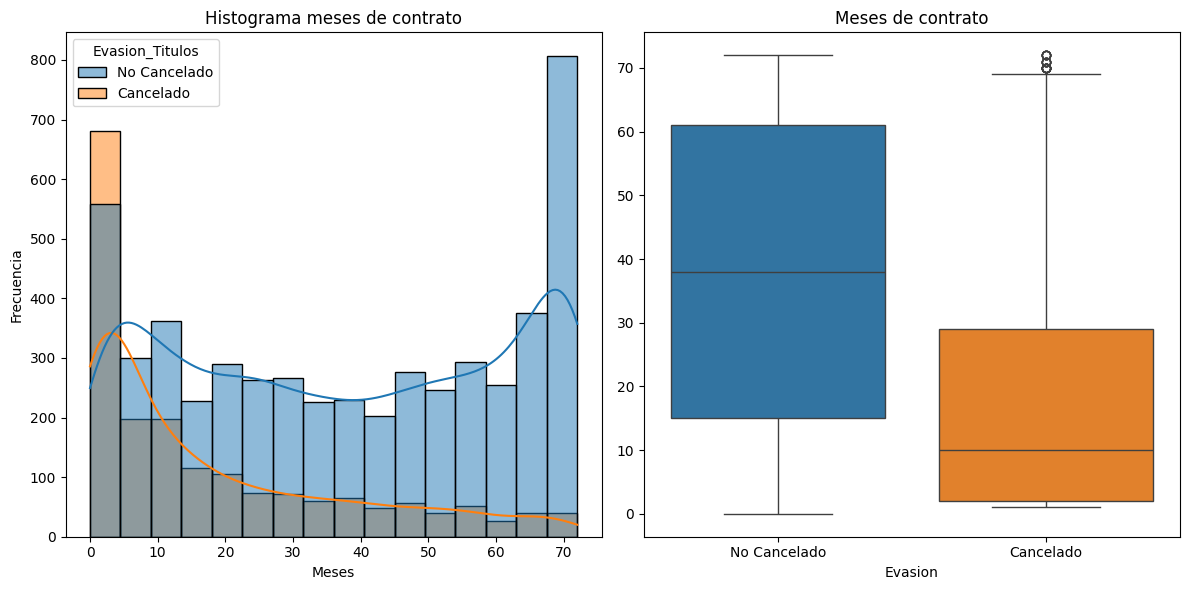

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
datos_Telecom_X_normalizado['Evasion_Titulos'] = datos_Telecom_X_normalizado['Evasion'].map({0: 'No Cancelado', 1: 'Cancelado'})
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Antiguedad'], hue='Evasion_Titulos', kde=True)
plt.title(f'Histograma meses de contrato')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=datos_Telecom_X_normalizado, x='Evasion_Titulos', y='Antiguedad', hue='Evasion_Titulos')
plt.title(f'Meses de contrato')
plt.xlabel('Evasion')
plt.ylabel('')
plt.tight_layout()
plt.show()


#plt.tight_layout()
plt.show()

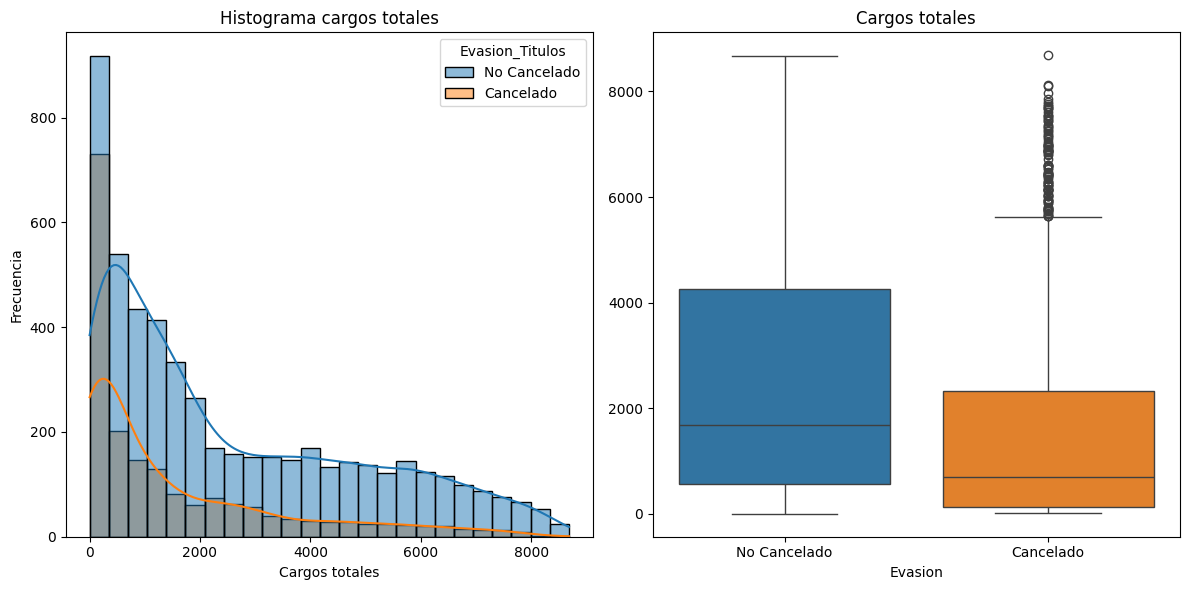

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Cargos_totales'], hue='Evasion_Titulos', kde=True)
plt.title(f'Histograma cargos totales')
plt.xlabel('Cargos totales')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=datos_Telecom_X_normalizado, x='Evasion_Titulos', y='Cargos_totales', hue='Evasion_Titulos')
plt.title(f'Cargos totales')
plt.xlabel('Evasion')
plt.ylabel('')
plt.tight_layout()
plt.show()

#plt.tight_layout()
plt.show()

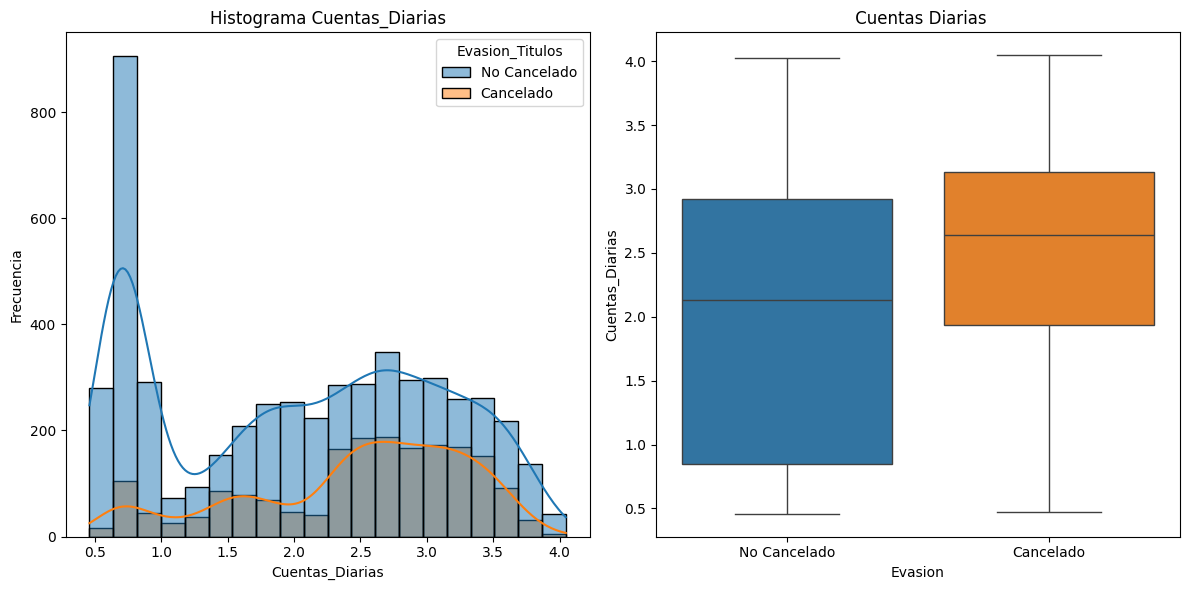

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Cuentas_Diarias'], hue='Evasion_Titulos', kde=True)
plt.title(f'Histograma Cuentas_Diarias')
#plt.legend(title='')
plt.xlabel('Cuentas_Diarias')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=datos_Telecom_X_normalizado, x='Evasion_Titulos', y='Cuentas_Diarias', hue='Evasion_Titulos')
plt.title(f' Cuentas Diarias')
plt.xlabel('Evasion')
plt.ylabel('Cuentas_Diarias')
plt.tight_layout()
plt.show()

#plt.tight_layout()
plt.show()

#### Se genera grafico con la distribución de la columna "Evasion"

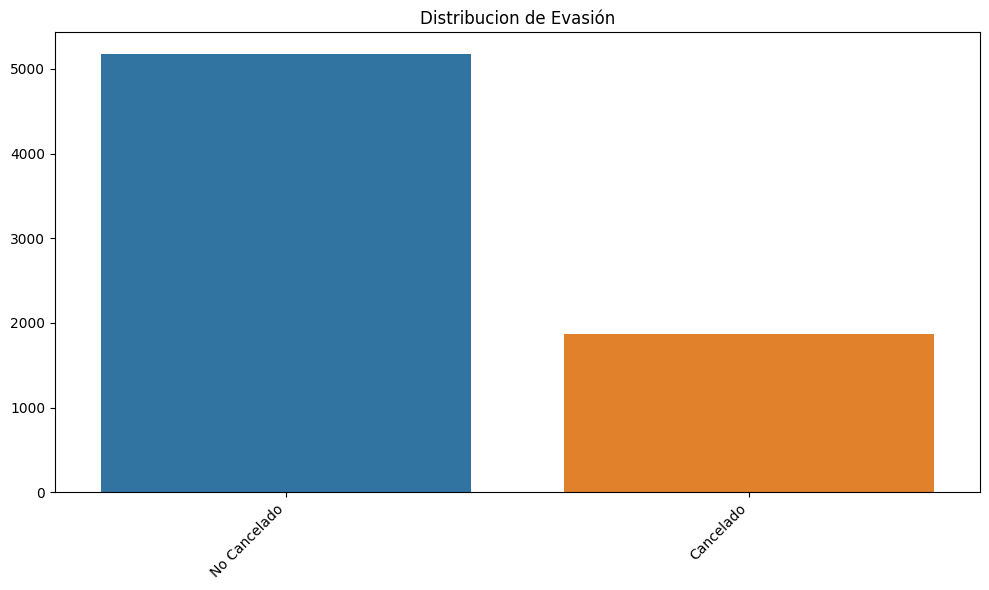

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Evasion_Titulos'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras, este análisis revela patrones interesantes, los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a recomendar acciones estratégicas.

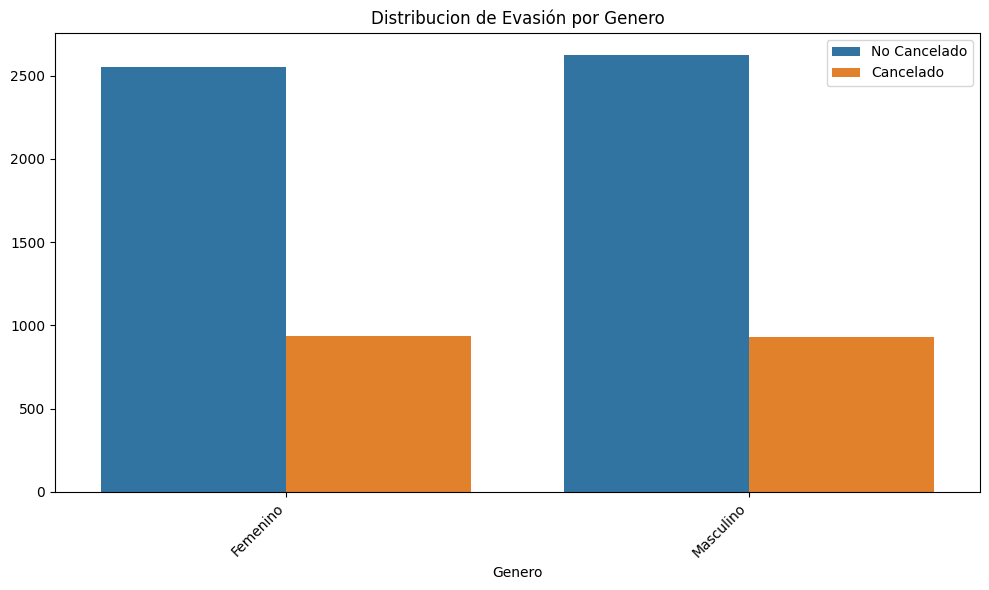

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Genero'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Genero')
plt.legend(title='')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

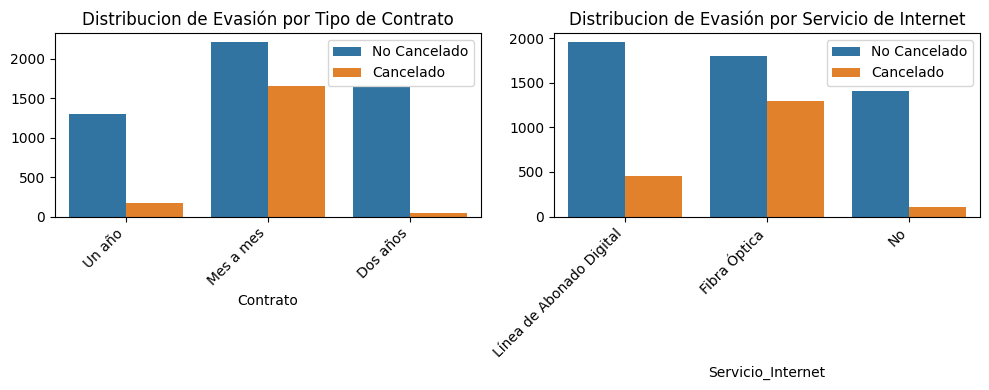

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1,  2, 1)
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Contrato'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Tipo de Contrato')
plt.legend(title='')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Servicio_Internet'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Servicio de Internet')
plt.legend(title='')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



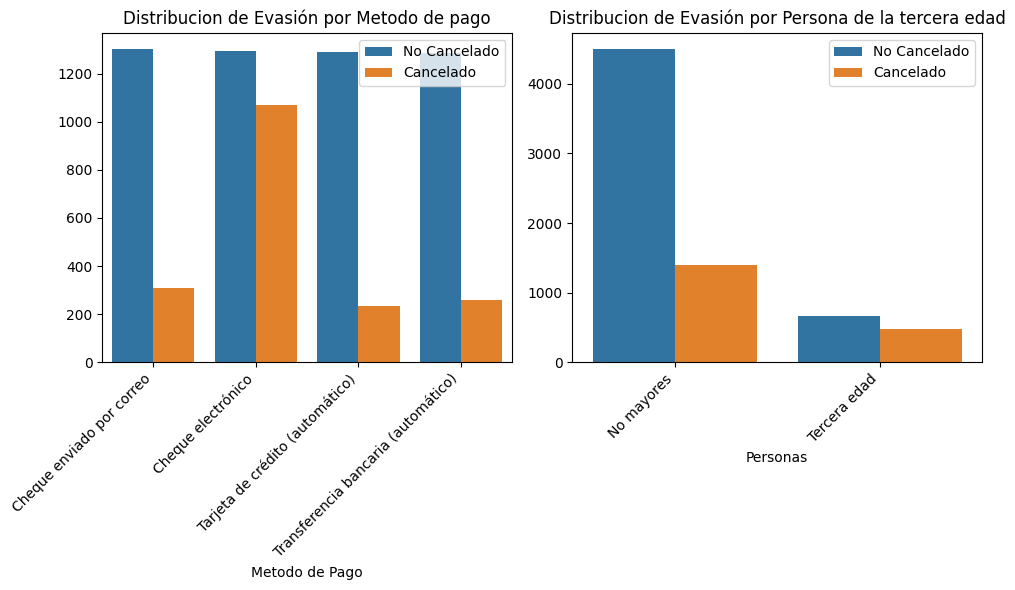

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,  2, 1)
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Metodo_pago'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Metodo de pago')
plt.legend(title='')
plt.ylabel('')
plt.xlabel('Metodo de Pago')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
datos_Telecom_X_normalizado['tercera_edad'] = datos_Telecom_X_normalizado['Persona_tercera_edad'].map({1: 'Tercera edad', 0: 'No mayores'})
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['tercera_edad'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Persona de la tercera edad')
plt.legend(title='')
plt.ylabel('')
plt.xlabel('Personas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

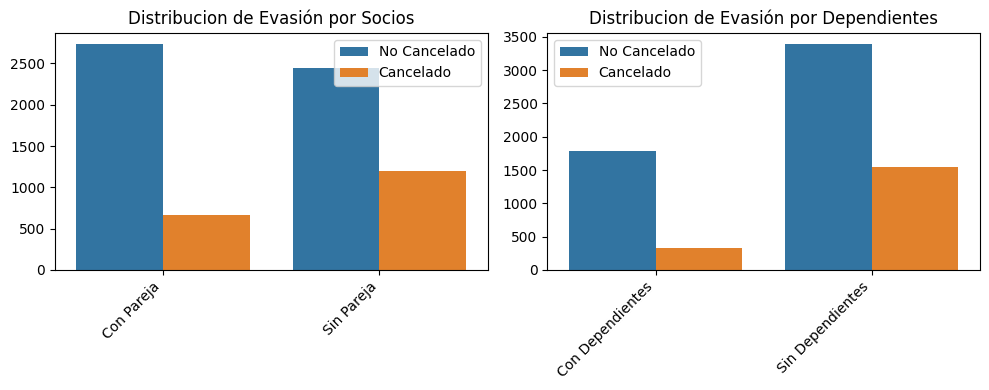

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1,  2, 1)
datos_Telecom_X_normalizado['Socios'] = datos_Telecom_X_normalizado['Socio'].map({1: 'Con Pareja', 0: 'Sin Pareja'})
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Socios'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Socios')
plt.legend(title='')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
datos_Telecom_X_normalizado['Dependiente'] = datos_Telecom_X_normalizado['Dependientes'].map({1: 'Con Dependientes', 0: 'Sin Dependientes'})
sns.countplot(data=datos_Telecom_X_normalizado, x=datos_Telecom_X_normalizado['Dependiente'], hue='Evasion_Titulos')
plt.title(f'Distribucion de Evasión por Dependientes')
plt.legend(title='')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#📄Informe final

## Resumen:

### Hallazgos Clave del Análisis de Datos

*   **Características Categóricas:**
	* Los clientes con un contrato "Mes a Mes" tienen una propensión significativamente mayor a abandonar el servicio que aquellos con contratos a largo plazo.
	* Los clientes con servicio de internet de Fibra Óptica presentan una mayor tasa de abandono en comparación con otros tipos de servicios de internet.
	* El uso de cheque electrónico como método de pago se asocia con una mayor tasa de abandono.
*	**Características Numéricas:**
	*  Los clientes que abandonan el servicio tienen una antigüedad media considerablemente menor (18 meses) en comparación con los clientes que no abandonan el servicio (38 meses).
	* Las personas mayores (personas de tercera edad) tienen casi el doble de probabilidades de abandonar el servicio que las personas no mayores (tasa de abandono media de 0.25 frente a 0.13).
	*  Los clientes sin pareja (socio) y dependientes (dependientes) tienen mayor probabilidad de abandonar el servicio.
	* Los clientes que abandonan su cuenta tienen menos probabilidades de contar con servicios de seguridad en línea, copias de seguridad en línea, protección de dispositivos o soporte técnico.
	*  Los clientes que abandonan su cuenta tienen mayor probabilidad de usar la facturación electrónica (75%) en comparación con los clientes que no abandonan su cuenta (54%).
	* Los clientes con cargos mensuales promedio más altos tienden a abandonar su cuenta más (cargo mensual promedio de 74.44 para los que abandonan su cuenta frente a 61.27 para los que no abandonan su cuenta).
	* Los clientes que abandonan su cuenta tienen cargos totales promedio significativamente menores (1531.80) que los clientes que no abandonan su cuenta (2549.91), probablemente debido a una menor permanencia.
	* Los clientes con cargos diarios promedio más altos tienen mayor probabilidad de abandonar su cuenta (2.48 para los que abandonan su cuenta frente a 2.04 para los que no abandonan su cuenta).

### Insights o próximos pasos

* Enfocar los esfuerzos de retención en los clientes con contratos mes a mes y aquellos que utilizan fibra óptica o cheque electrónico.
* Investigar estrategias para aumentar la adopción de servicios de seguridad y soporte entre los clientes, en particular aquellos con alto riesgo de abandono.